# seaborn.stripplot
---
A strip plot is a scatter plot where one of the variables is categorical. They can be combined with other plots to provide additional information. For example, a boxplot with an overlaid strip plot becomes more similar to a violin plot because some additional information about how the underlying data is distributed becomes visible.

dataset:

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams['font.family'] = "serif"

In [2]:
from sklearn import datasets
iris_data = datasets.load_iris()

In [3]:
iris_data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
df = pd.DataFrame(data=np.column_stack([iris_data['data'],iris_data['target']]),
                  columns=['Sepal Length (cm)',
                           'Sepal Width (cm)',
                           'Petal Length (cm)',
                           'Petal Width (cm)',
                           'Species'])

In [5]:
df['Species'] = iris_data['target_names'][df.Species.astype(int)]

Basic plot

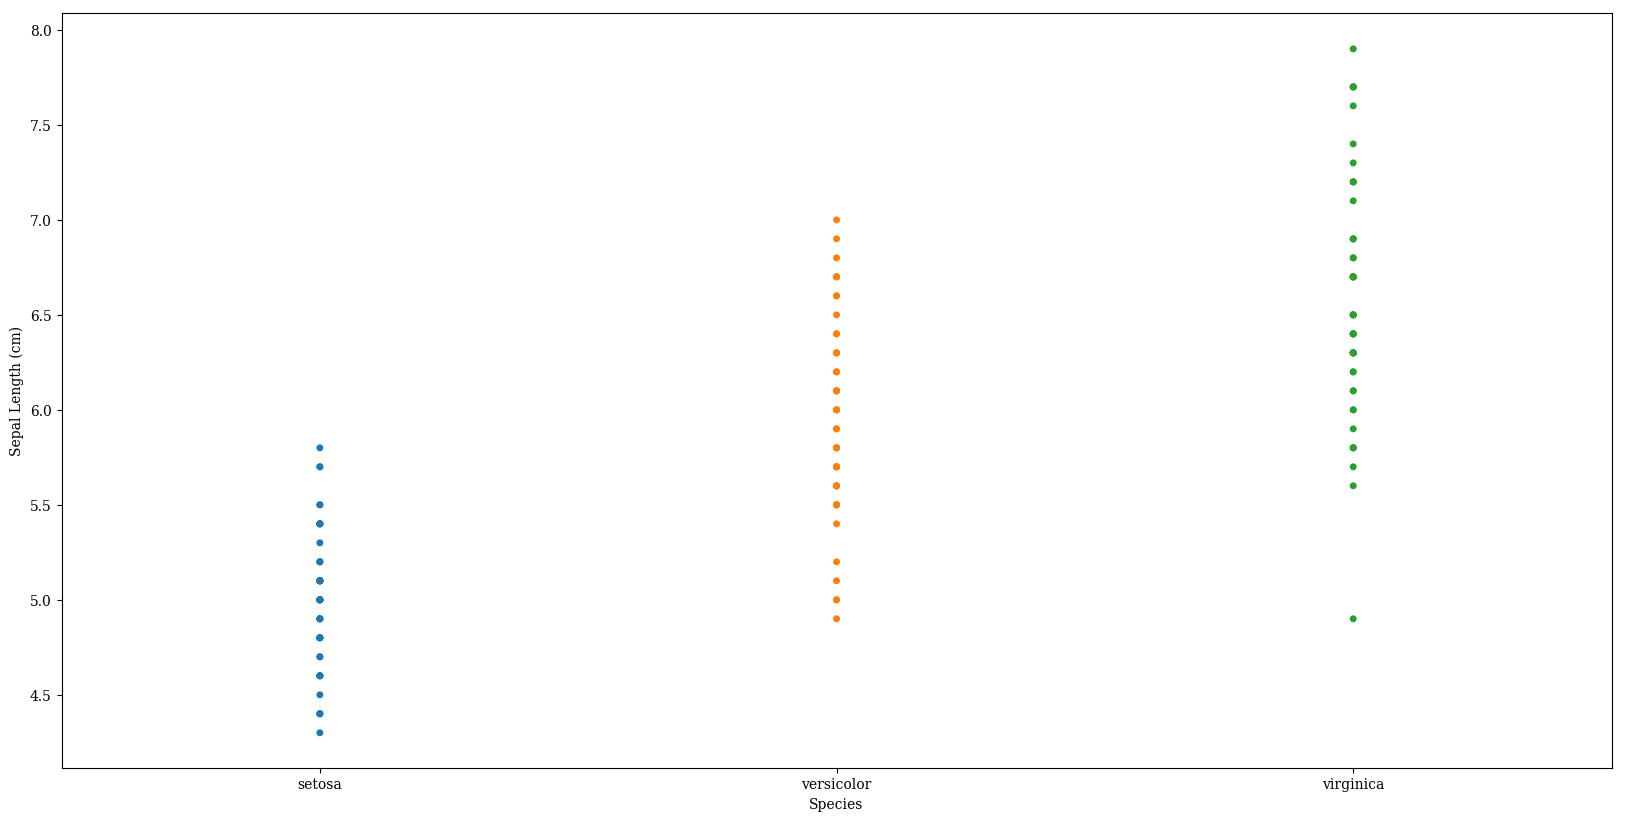

In [6]:
p = sns.stripplot(data=df, x='Species', y='Sepal Length (cm)')

Change the `order` in which the names are displayed

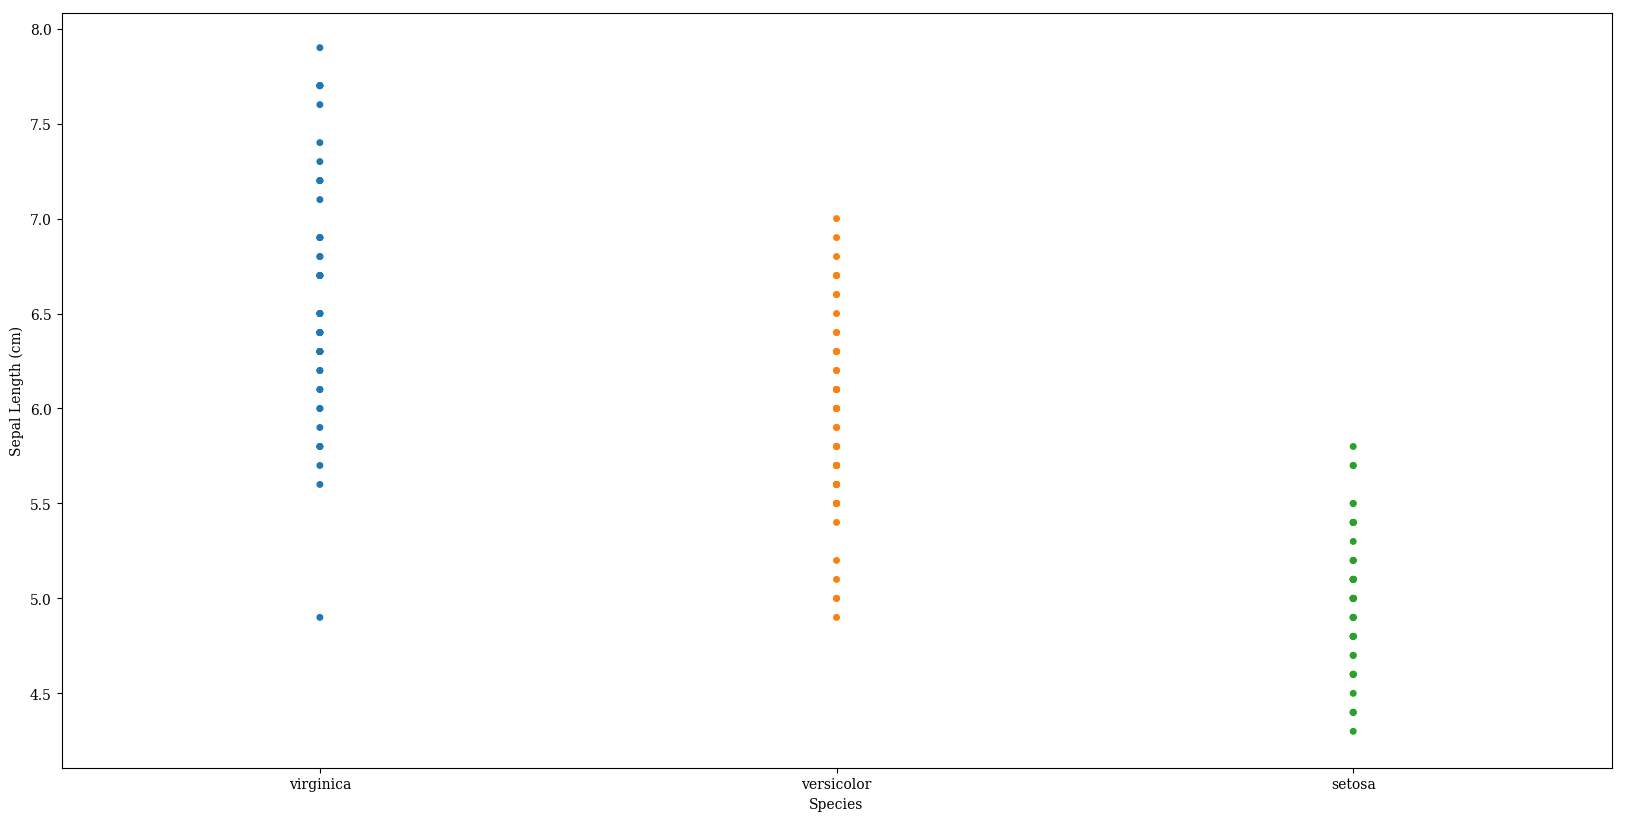

In [7]:
p = sns.stripplot(data=df,
                  x='Species',
                  y='Sepal Length (cm)',
                  order=sorted(df.Species.unique(), reverse=True))

`jitter` can be used to randomly provide displacements along the horizontal axis, which is useful when there are large clusters of datapoints

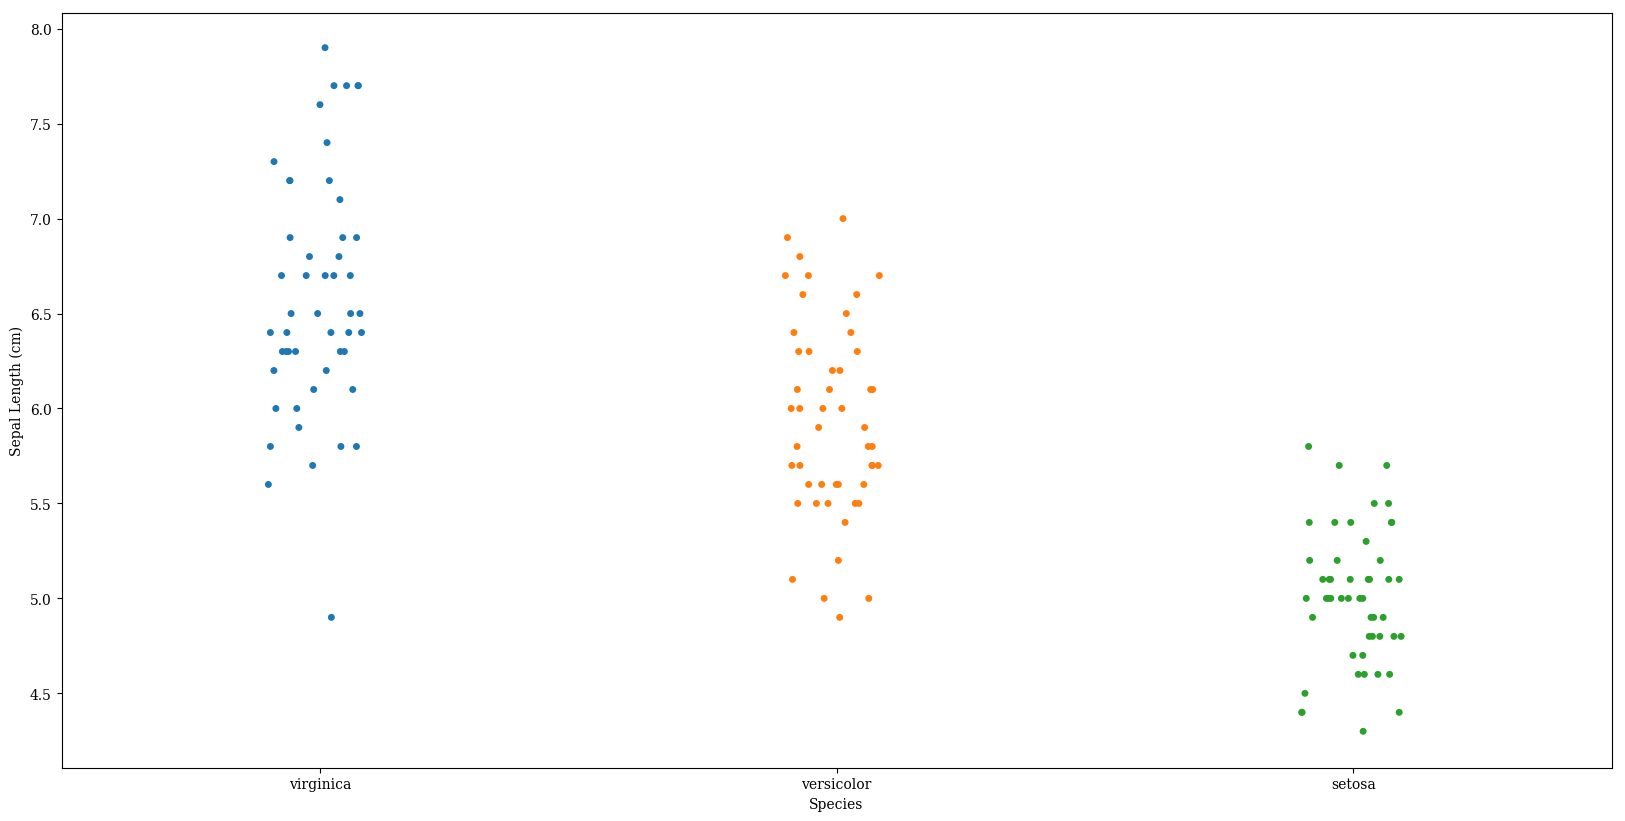

In [8]:
p = sns.stripplot(data=df,
                  x='Species',
                  y='Sepal Length (cm)',
                  order=sorted(df.Species.unique(), reverse=True),
                  jitter=0.1)

To help illustrate some of the other properties, I'll randomly assign a label "Day" or "Night" to all the flowers.

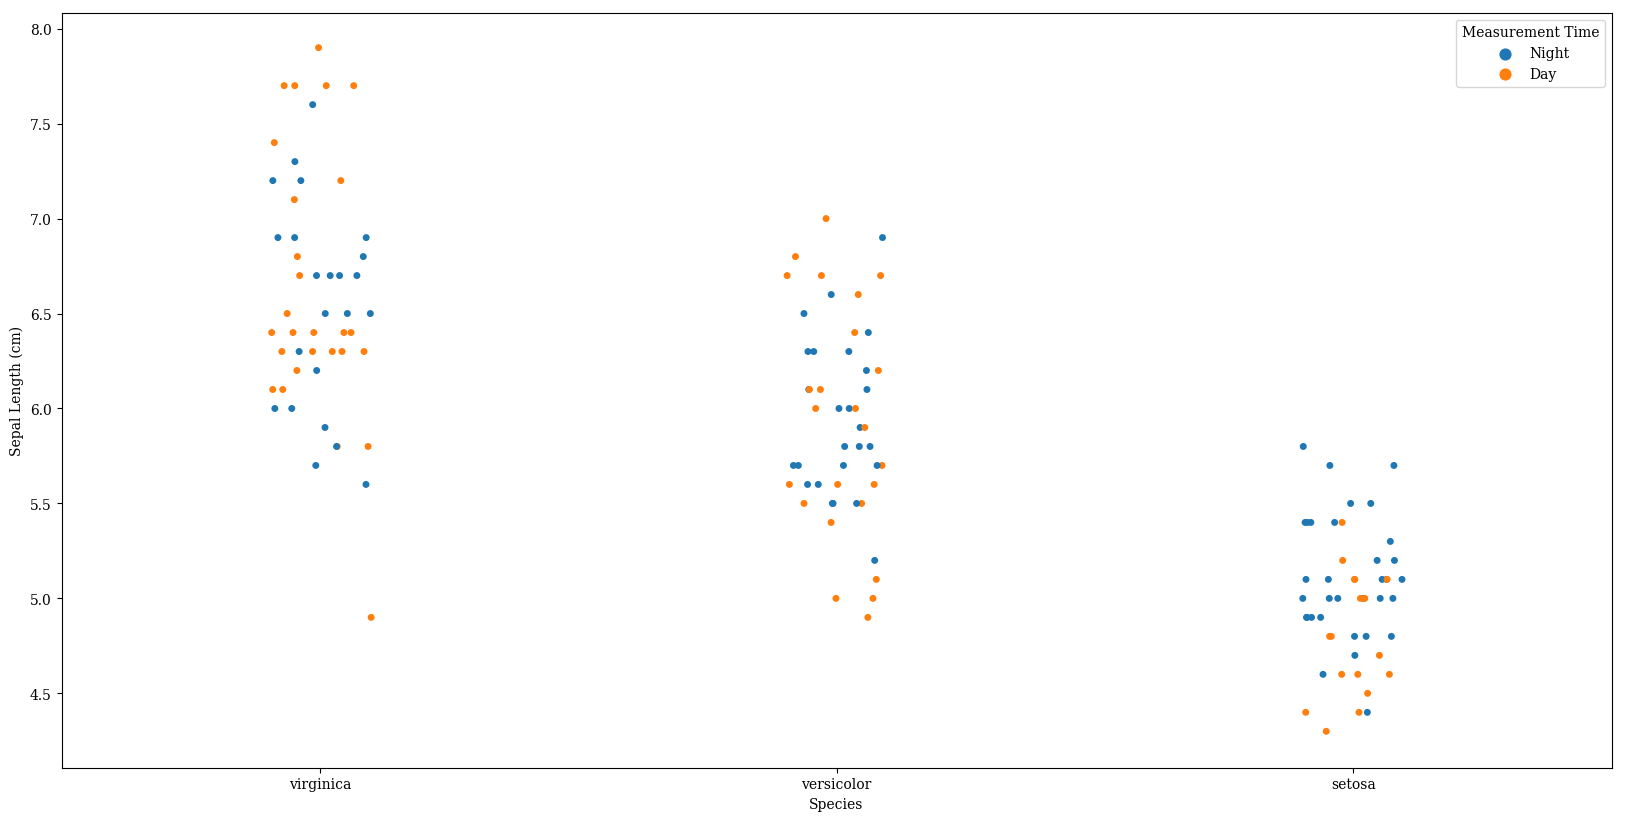

In [9]:
df['Measurement Time'] = 'Night'
df.loc[np.random.rand(len(df)) > 0.5, 'Measurement Time'] = 'Day'
p = sns.stripplot(data=df,
                  x='Species',
                  y='Sepal Length (cm)',
                  hue='Measurement Time',
                  order=sorted(df.Species.unique(), reverse=True),
                  jitter=0.1)

We see the default behavior is to stack the different hues on top of each other. This can be avoided with `dodge` (formerly called `split`)

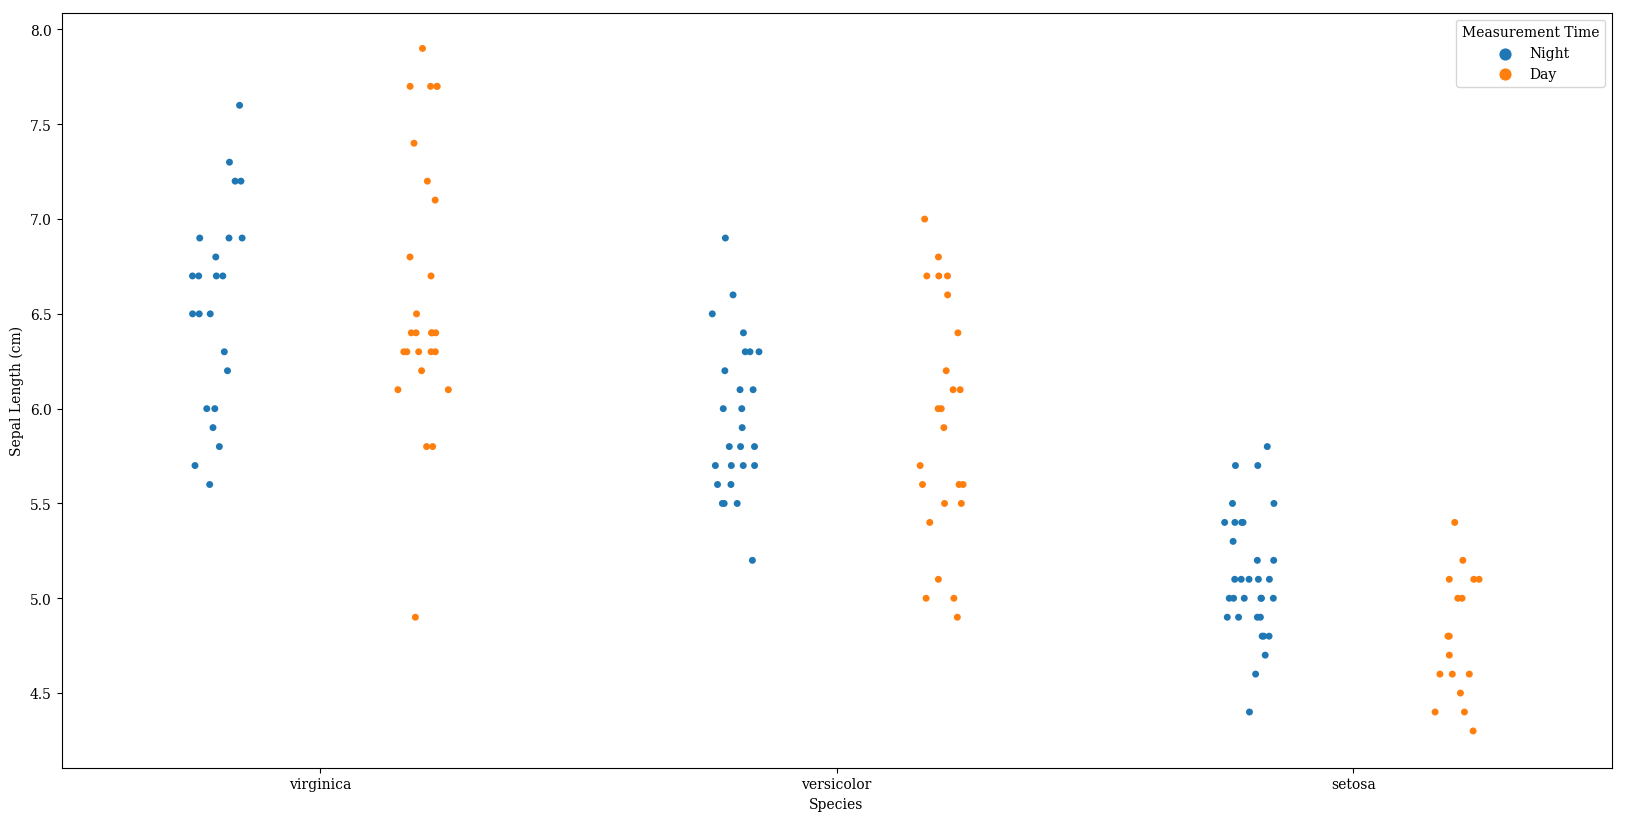

In [10]:
p = sns.stripplot(data=df,
                  x='Species',
                  y='Sepal Length (cm)',
                  hue='Measurement Time',
                  order=sorted(df.Species.unique(), reverse=True),
                  jitter=0.1,
                  dodge=True)

Flipping x and y inputs and setting `orient` to 'h' can be used to make a horizontal plot

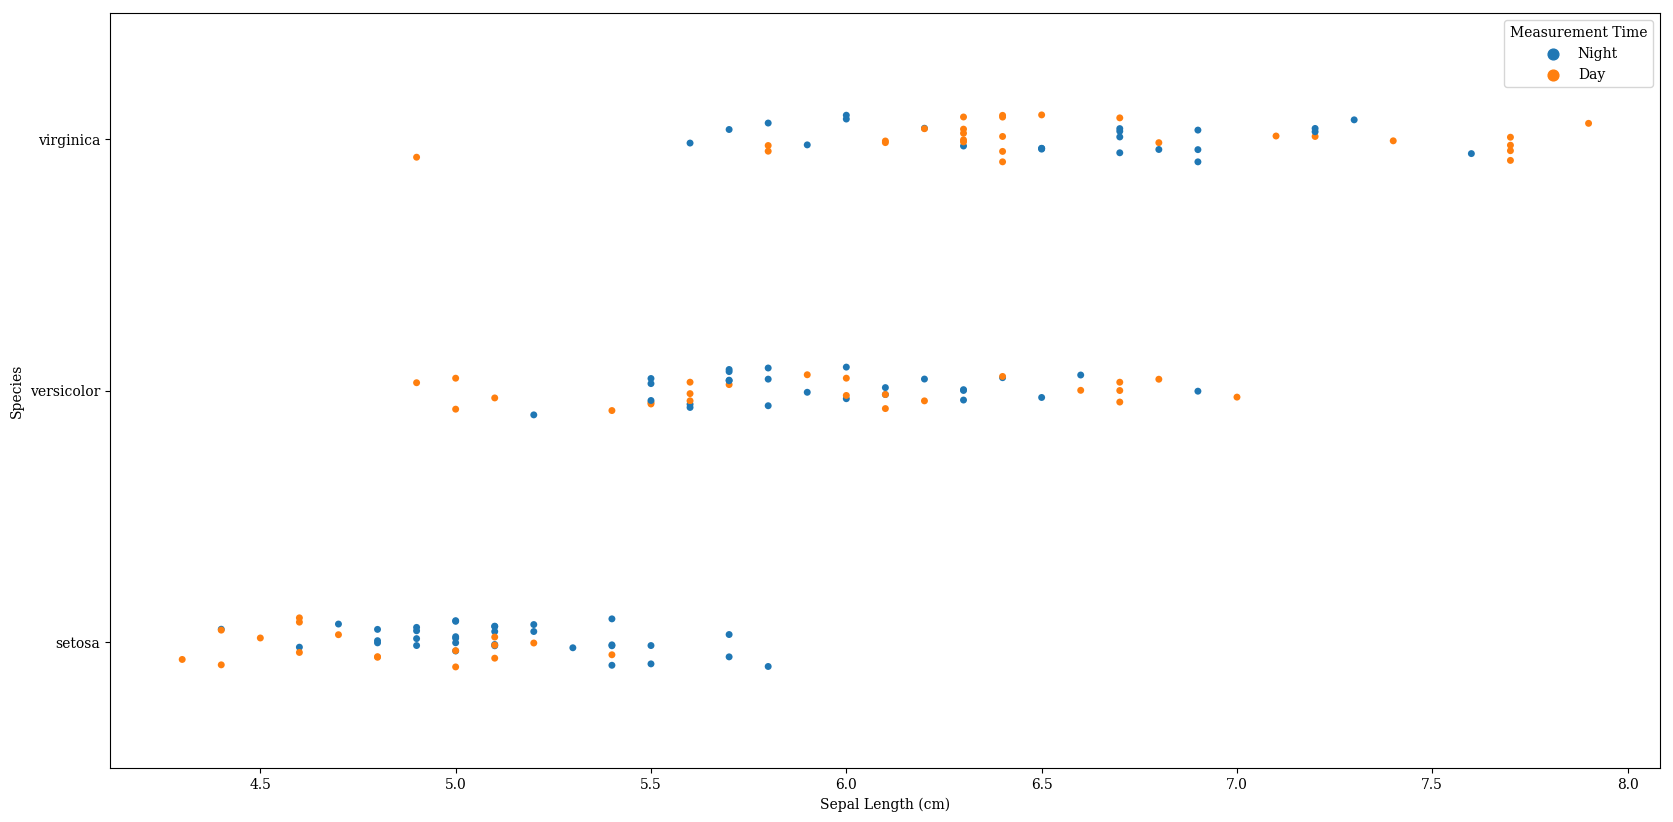

In [11]:
p = sns.stripplot(data=df,
                  y='Species',
                  x='Sepal Length (cm)',
                  hue='Measurement Time',
                  order=sorted(df.Species.unique(), reverse=True),
                  jitter=0.1,
                  dodge=False,
                  orient='h')

For coloring, you can either provide a single color to `color`...

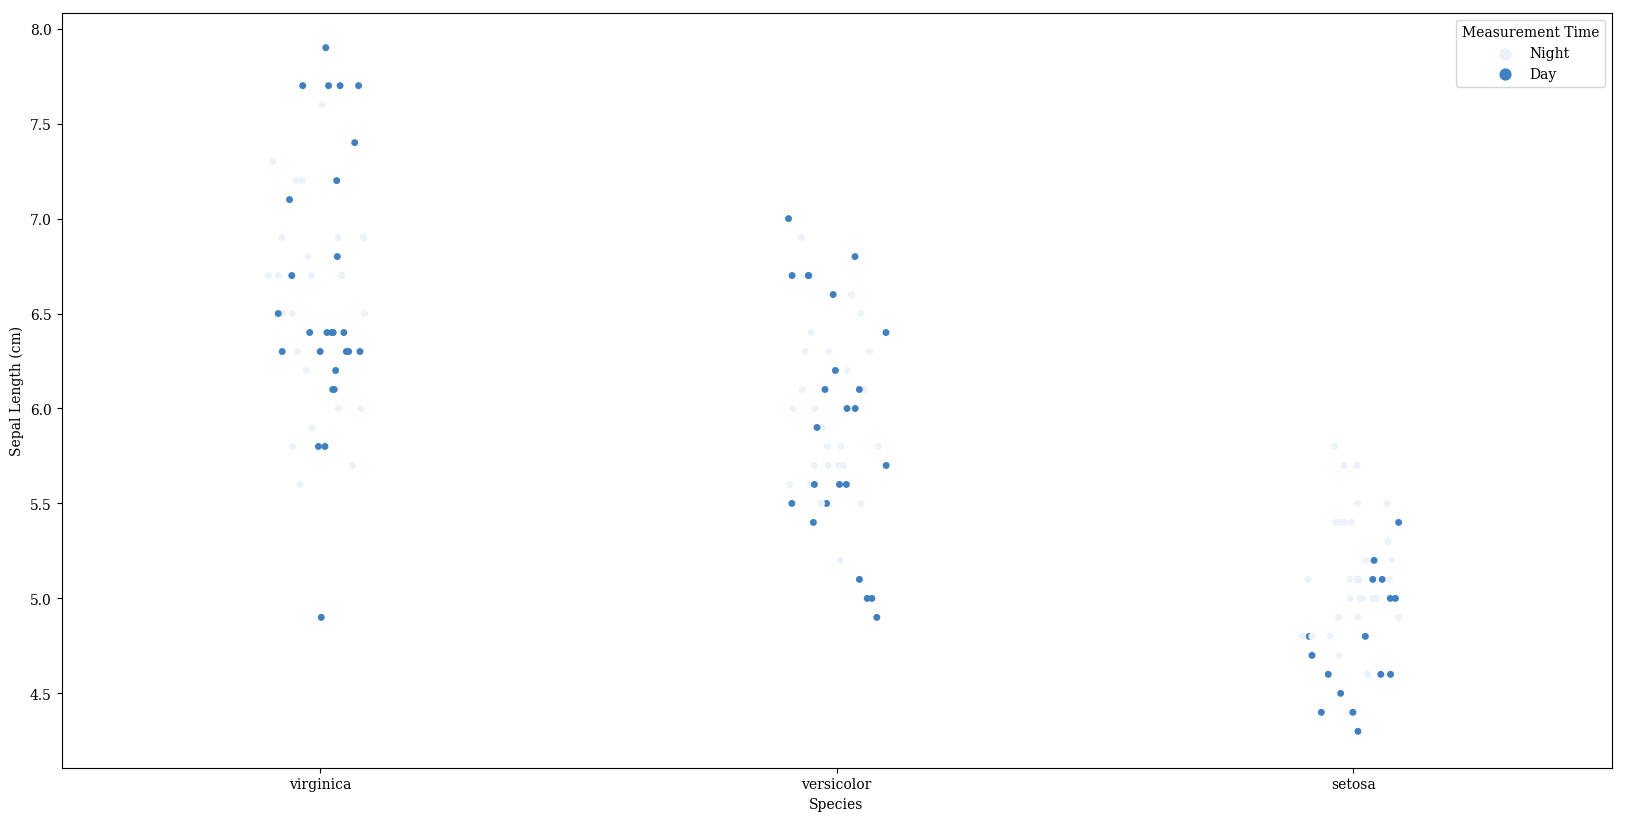

In [12]:
p = sns.stripplot(data=df,
                  x='Species',
                  y='Sepal Length (cm)',
                  hue='Measurement Time',
                  color=(.25,.5,.75),
                  order=sorted(df.Species.unique(), reverse=True),
                  jitter=0.1,
                  dodge=False)

...or you can use one of the many variations of the `palette` parameter

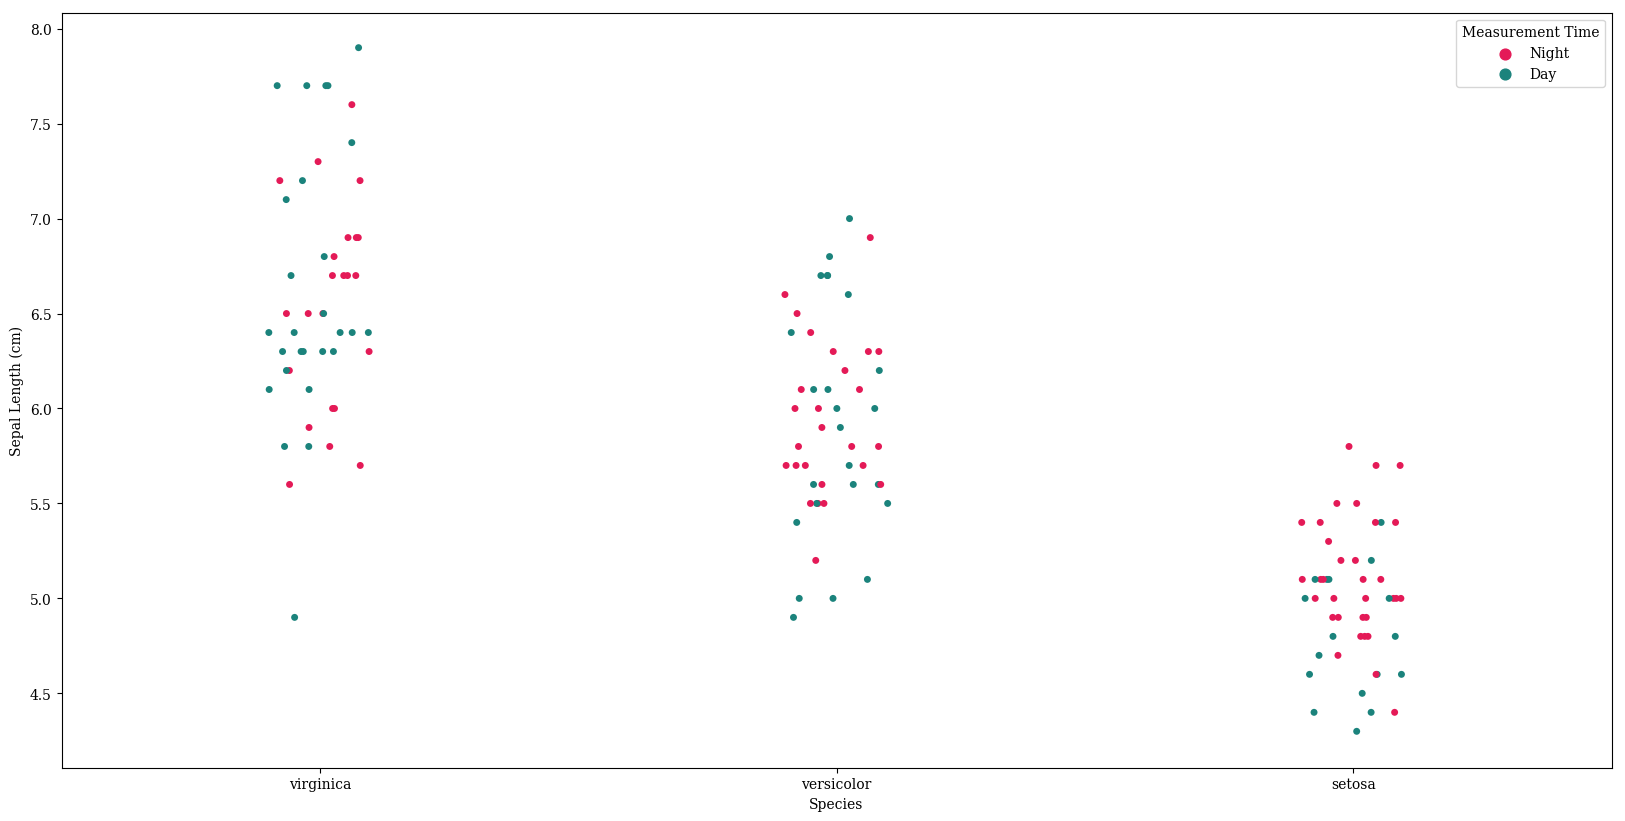

In [13]:
p = sns.stripplot(data=df,
                  x='Species',
                  y='Sepal Length (cm)',
                  hue='Measurement Time',
                  palette=sns.husl_palette(2, l=0.5, s=.95),
                  order=sorted(df.Species.unique(), reverse=True),
                  jitter=0.1,
                  dodge=False)

Adjust the marker `size`

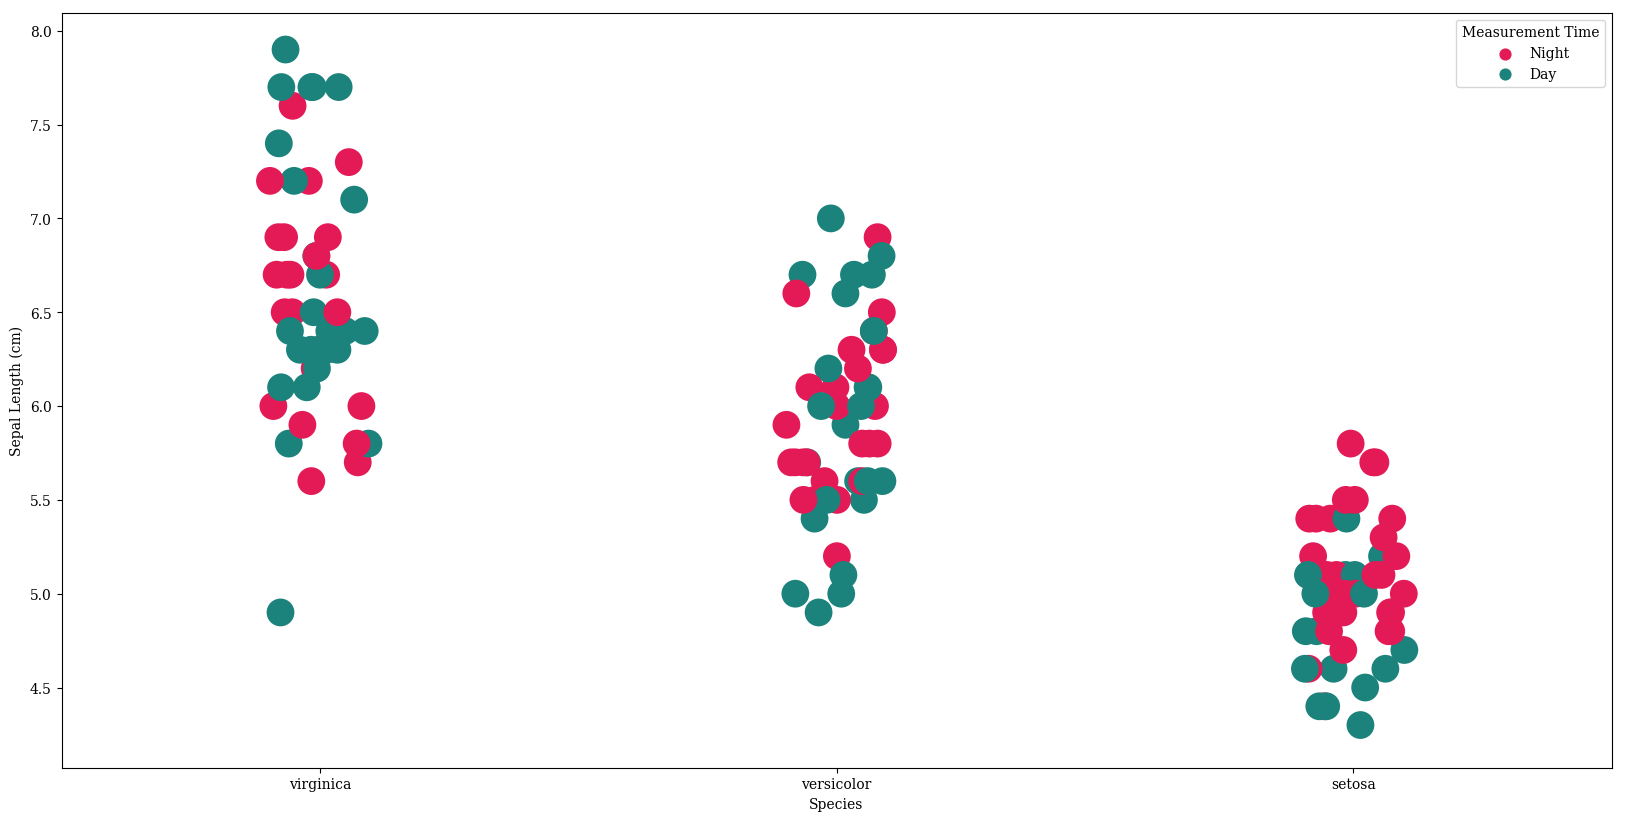

In [14]:
p = sns.stripplot(data=df,
                  x='Species',
                  y='Sepal Length (cm)',
                  hue='Measurement Time',
                  palette=sns.husl_palette(2, l=0.5, s=.95),
                  order=sorted(df.Species.unique(), reverse=True),
                  jitter=0.1,
                  dodge=False,
                  size=20)

Adjust the `linewidth` of the edges of the circles

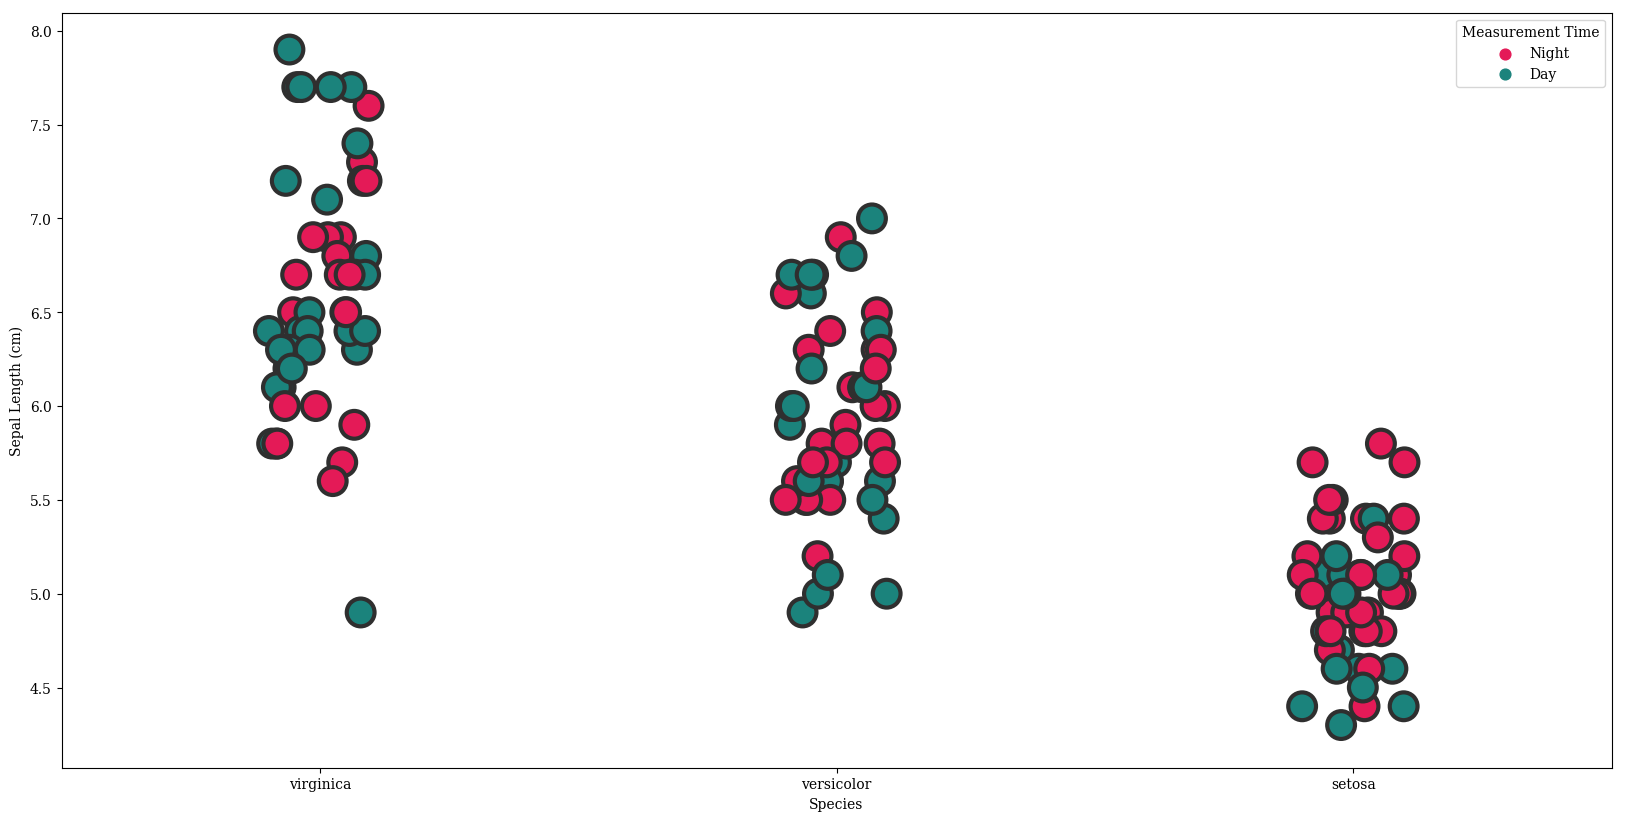

In [15]:
p = sns.stripplot(data=df,
                  x='Species',
                  y='Sepal Length (cm)',
                  hue='Measurement Time',
                  palette=sns.husl_palette(2, l=0.5, s=.95),
                  order=sorted(df.Species.unique(), reverse=True),
                  jitter=0.1,
                  dodge=False,
                  size=20,
                  linewidth=3)

Change the color of these lines with `edgecolor`

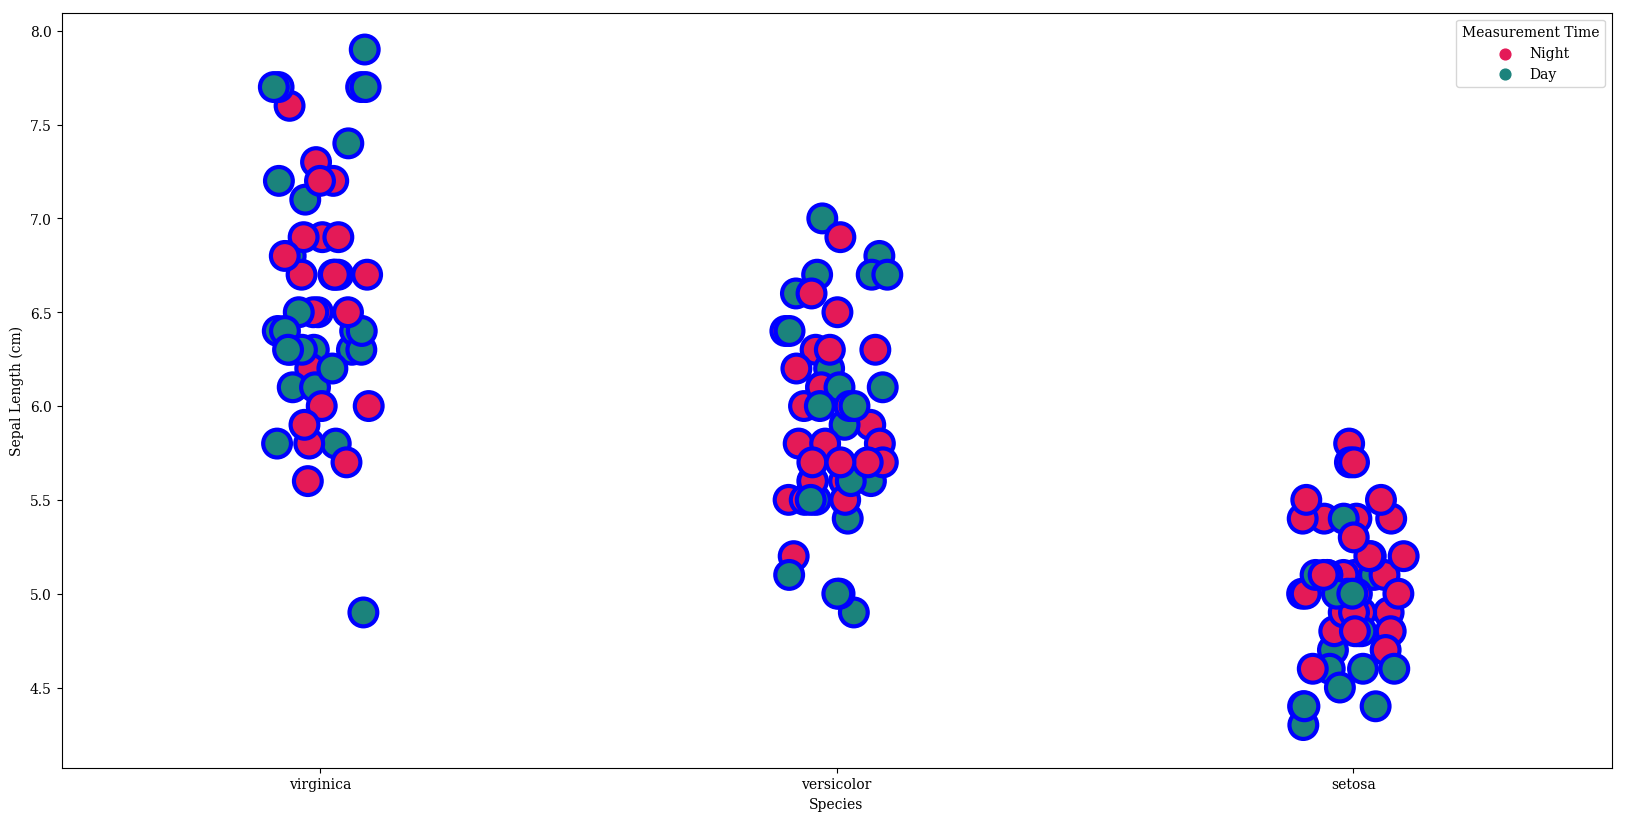

In [16]:
p = sns.stripplot(data=df,
                  x='Species',
                  y='Sepal Length (cm)',
                  hue='Measurement Time',
                  palette=sns.husl_palette(2, l=0.5, s=.95),
                  order=sorted(df.Species.unique(), reverse=True),
                  jitter=0.1,
                  dodge=False,
                  size=20,
                  edgecolor='blue',
                  linewidth=3)

Swarmplots look good when overlaid on top of another categorical plot, like `boxplot`

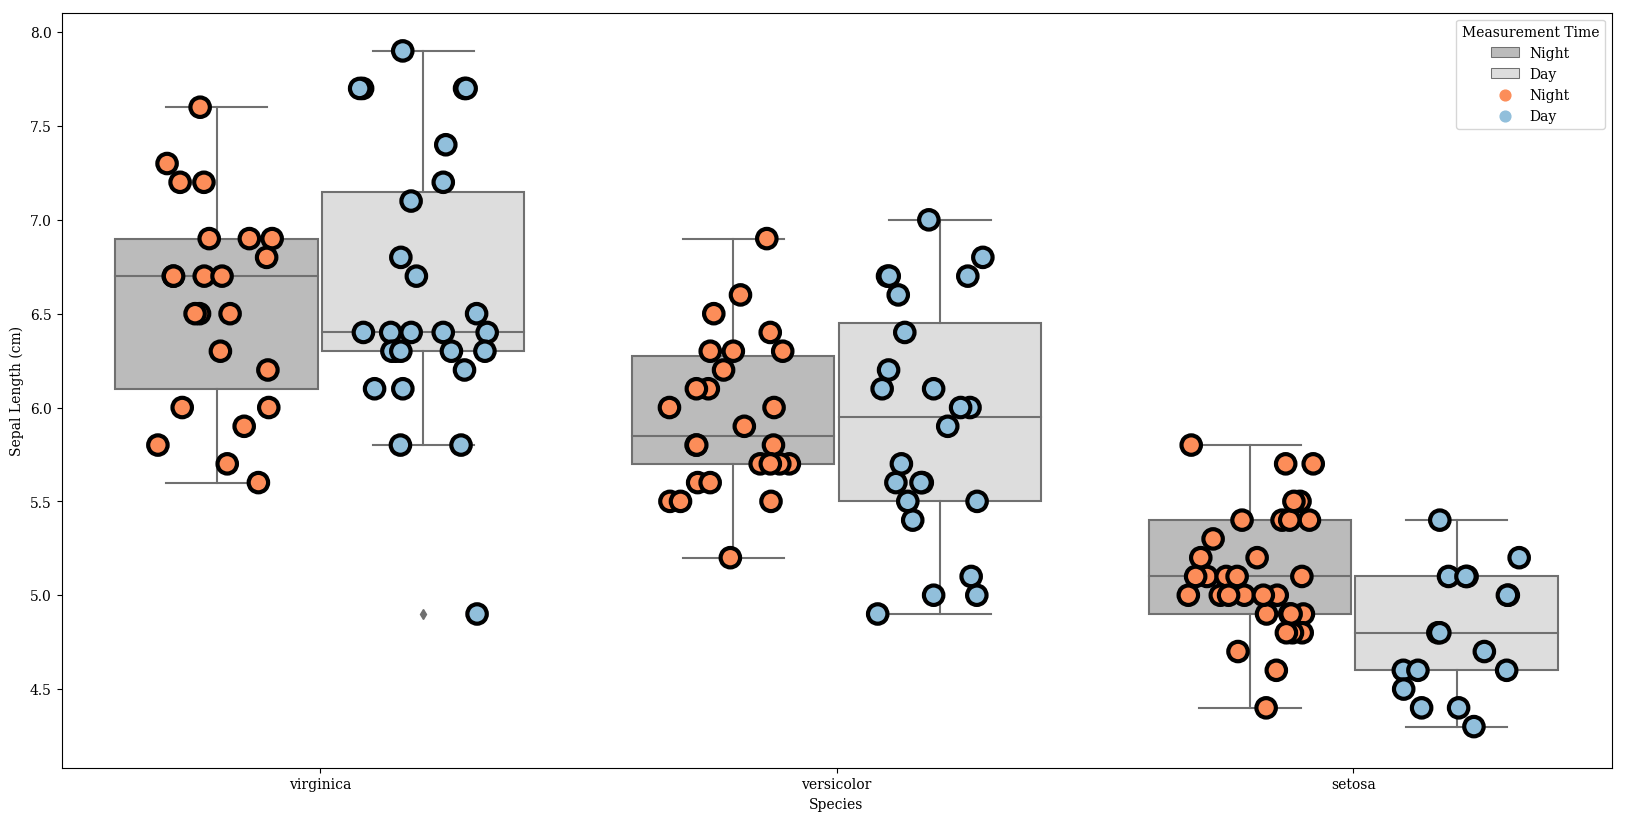

In [17]:
params = dict(data=df,
              x='Species',
              y='Sepal Length (cm)',
              hue='Measurement Time',
              order=sorted(df.Species.unique(), reverse=True),
              dodge=True)
p = sns.stripplot(size=14,
                  jitter=0.25,
                  palette=['#fc8d59','#91bfdb'],
                  edgecolor='black',
                  linewidth=3,
                  **params)
p_box = sns.boxplot(palette=['#BBBBBB','#DDDDDD'],**params)

Finalize

Night
Day
Night
Day


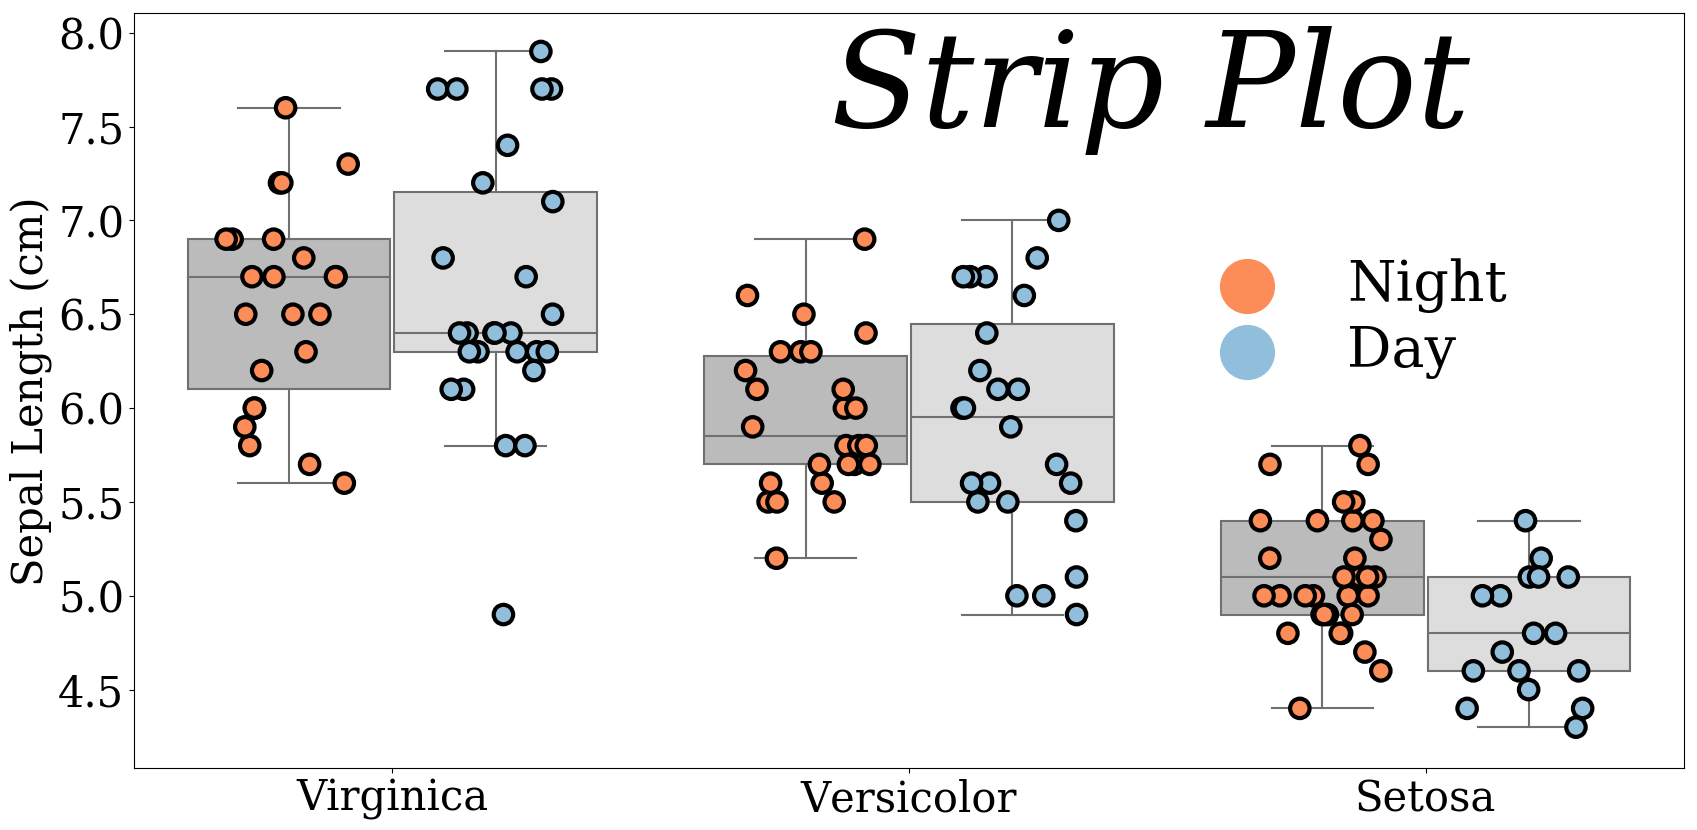

In [18]:
plt.rcParams['font.size'] = 30
df.Species = df.Species.apply(lambda x: x.capitalize())
params = dict(data=df,
              x='Species',
              y='Sepal Length (cm)',
              hue='Measurement Time',
              order=sorted(df.Species.unique(), reverse=True),
              dodge=True)
p = sns.stripplot(size=14,
                  jitter=0.25,
                  palette=['#fc8d59','#91bfdb'],
                  edgecolor='black',
                  linewidth=3,
                  **params)
p_box = sns.boxplot(palette=['#BBBBBB','#DDDDDD'],**params)
handles,labels = p.get_legend_handles_labels()
#for h in handles:
#    h.set_height(3)
#handles[2].set_linewidth(33)
for l in labels:
    #l.title = "hey"
    print(l)
plt.legend(handles[2:],
           labels[2:],
           bbox_to_anchor=(.65,.45),
           fontsize = 40,
           markerscale=5,
           frameon=False,
           labelspacing=0.2)
plt.text(0.85,7.5, "Strip Plot", fontsize = 95, color='Black', fontstyle='italic')
plt.xlabel('')
p

In [19]:
p.get_figure().savefig('../../figures/stripplot.png')